## Bank Telemarketing Campaign Case Study.

## Introduction

Welcome to this case study on Exploratory Data Analytics (EDA), focusing on a real-world scenario of a bank marketing campaign. This case study provides insights into the significance of EDA in the context of machine learning.

#### Problem Statement

The bank offers a variety of financial services/products, including savings accounts, current accounts, and debit cards. To enhance its revenue, the bank conducts marketing campaigns for products such as credit cards, term deposits, and loans. These campaigns target existing customers, aiming for cost-efficiency to maximize overall revenues and profits. The objective is to leverage EDA techniques on the provided dataset to analyze patterns and derive insights for future marketing campaigns.

The dataset pertains to a telemarketing campaign conducted by the bank, specifically for promoting 'Term Deposits' to foster long-term relationships with customers. Term deposits, also known as fixed deposits, are cash investments made for a predetermined period with fixed interest rates higher than those of regular savings accounts. The dataset contains information about customers contacted during a particular year to open term deposit accounts.

The aim is to conduct end-to-end EDA on this dataset to identify areas where the bank can improve its positive response rate and optimize its marketing efforts.


### Data Types Overview

Upon examining the dataset, various data types are evident, categorized into numerical, categorical, ordinal, and special types.

#### Numeric Data Type
- banking dataset: salary, balance, duration, and age.

#### Categorical Data Type
- banking dataset: education, job, marital status, outcome of the previous marketing campaign, and month.

#### Ordinal Data Type
- banking dataset: Age group.

#### Time and Date Type

#### Coordinates Type of Data
- banking dataset: Latitude and longitude.


In [2]:
#import the warnings.# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting matplotlib to display plots inline
%matplotlib inline

# Suppressing warnings
import warnings
warnings.filterwarnings('ignore')


In [59]:
# Reading the dataset into a pandas DataFrame
inp0 = pd.read_csv('bank_marketing_updated_v1.csv')

# Displaying the first few rows of the DataFrame
inp0.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


### Fixing the Rows and Columns

#### Checklist for Fixing Rows:

1. **Delete Summary Rows**:
   - Remove any total or subtotal rows that summarize data rather than representing individual observations.

2. **Delete Incorrect Rows**:
   - Ensure to remove any incorrect rows such as header or footer rows that don't contain actual data.

3. **Delete Extra Rows**:
   - Eliminate any additional rows that may include column numbers, indicators, blank rows, page numbers, or other irrelevant information.

#### Checklist for Fixing Columns:

1. **Merge Columns**:
   - Merge columns if necessary to create unique identifiers. For example, merging 'State' and 'City' columns to create a single 'Full address' column.

2. **Split Columns**:
   - Split columns to extract more data if needed. For instance, splitting the 'Address' column into separate 'State' and 'City' columns for individual analysis.

3. **Add Column Names**:
   - Ensure all columns have appropriate names. If any column names are missing, add them accordingly.

4. **Rename Columns Consistently**:
   - Rename columns consistently, avoiding abbreviations or encoded column names for clarity and consistency.

5. **Delete Unnecessary Columns**:
   - Remove any columns that are unnecessary for analysis or contain redundant information.

6. **Align Misaligned Columns**:
   - Check for misaligned columns in the dataset and align them correctly if any shifts are present.


In [60]:
# Read the file into inp0, excluding the first two rows
inp0 = pd.read_csv('bank_marketing_updated_v1.csv', skiprows=2)

# Print the head of the DataFrame
print(inp0.head())


   customerid   age  salary  balance  marital                  jobedu  \
0           1  58.0  100000     2143  married     management,tertiary   
1           2  44.0   60000       29   single    technician,secondary   
2           3  33.0  120000        2  married  entrepreneur,secondary   
3           4  47.0   20000     1506  married     blue-collar,unknown   
4           5  33.0       0        1   single         unknown,unknown   

  targeted default housing loan  contact  day      month duration  campaign  \
0      yes      no     yes   no  unknown    5  may, 2017  261 sec         1   
1      yes      no     yes   no  unknown    5  may, 2017  151 sec         1   
2      yes      no     yes  yes  unknown    5  may, 2017   76 sec         1   
3       no      no     yes   no  unknown    5  may, 2017   92 sec         1   
4       no      no      no   no  unknown    5  may, 2017  198 sec         1   

   pdays  previous poutcome response  
0     -1         0  unknown       no  
1     -1

In [61]:
# Print the information about the variables to inspect their data types
print(inp0.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(1), int64(7), 

In [62]:
# Calculate the average age of customers, ignoring missing values
average_age = inp0['age'].mean(skipna=True)
print("Average age of customers (excluding missing values):", average_age)


Average age of customers (excluding missing values): 40.93565090394105


In [63]:
# Drop the 'customer_id' column as it is not useful
inp0.drop(columns=['customerid'], inplace=True)

# Displaying the first few rows of the DataFrame
inp0.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [64]:
# Extract job from 'jobedu' column and create a new 'job' column
inp0['job'] = inp0['jobedu'].apply(lambda x: x.split(',')[0])

# Extract education from 'jobedu' column and create a new 'education' column
inp0['education'] = inp0['jobedu'].apply(lambda x: x.split(',')[1])

# Drop the 'jobedu' column from the dataframe
inp0.drop(columns=['jobedu'], inplace=True)


# Displaying the first few rows of the DataFrame
inp0.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


### Impute/Remove Missing Values

Key Takeaways from the Lecture on Missing Values:

1. **Identifying Missing Values**:
   - Set values as missing values: Recognize values that indicate missing data, such as blank strings, "NA", "XX", "999", etc.
   
2. **Handling Missing Values**:
   - Adding is good, exaggerating is bad: Strive to obtain information from reliable external sources. If unavailable, it's preferable to retain missing values rather than fabricating data.
   - Delete Rows and Columns: Delete rows with insignificant missing values, while columns can be removed if the missing values are substantial and would not significantly affect analysis results.
   - Fill Partial Missing Values Using Business Judgement: Some missing values, such as missing time zones or centuries, can be inferred based on context.

Types of Missing Values:

1. **MCAR (Missing Completely at Random)**:
   - The reason behind the missing value is not dependent on any other feature.
   
2. **MAR (Missing at Random)**:
   - The reason behind the missing value may be associated with some other features.
   
3. **MNAR (Missing Not at Random)**:
   - There is a specific reason behind the missing value, often related to unobserved variables or mechanisms.



##### Handling missing values in 'Age' column

In [65]:
# Count the missing values in the 'age' column
missing_age = inp0['age'].isnull().sum()
print("Missing values in the 'age' column:", missing_age)


# Calculate the percentage of missing values in the 'age' column
percentage_missing_age = (inp0['age'].isnull().sum() / len(inp0)) * 100
print("Percentage of missing values in the 'age' column:", percentage_missing_age)

# Drop the records with missing values in the 'age' column from inp0 and copy to inp1 dataframe
inp1 = inp0.dropna(subset=['age']).copy()


# Displaying the first few rows of the DataFrame
inp0.head()

Missing values in the 'age' column: 20
Percentage of missing values in the 'age' column: 0.0442370219636814


,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


##### handling missing values in month column

In [66]:
# Count the missing values in the 'month' column in inp1
missing_month = inp1['month'].isnull().sum()
print("Missing values in the 'month' column in inp1:", missing_month)
print("="*50)

# Print the percentage of each month in the DataFrame inp1
month_percentage = (inp1['month'].value_counts(normalize=True) * 100).round(2)
print("Percentage of each month in inp1:")
print(month_percentage)
print("="*50)

# Find the mode of the 'month' column in inp1
mode_month = inp1['month'].mode()[0]
print("Mode of the 'month' column in inp1:", mode_month)
print("="*50)

# Fill the missing values in the 'month' column with the mode value
inp1['month'].fillna(mode_month, inplace=True)

# Check for null values in the 'month' column in inp1
null_month = inp1[inp1['month'].isnull()]
print("Null values in the 'month' column in inp1:")
print(null_month)
print("="*50)


Missing values in the 'month' column in inp1: 50
Percentage of each month in inp1:
month
may, 2017    30.44
jul, 2017    15.25
aug, 2017    13.81
jun, 2017    11.81
nov, 2017     8.79
apr, 2017     6.49
feb, 2017     5.86
jan, 2017     3.11
oct, 2017     1.63
sep, 2017     1.28
mar, 2017     1.05
dec, 2017     0.47
Name: proportion, dtype: float64
Mode of the 'month' column in inp1: may, 2017
Null values in the 'month' column in inp1:
Empty DataFrame
Columns: [age, salary, balance, marital, targeted, default, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, response, job, education]
Index: []


##### Handling missing values in response column 

In [67]:
# Count the missing values in the 'response' column in inp1
missing_response = inp1['response'].isnull().sum()
print("Missing values in the 'response' column in inp1:", missing_response)
print("="*50)

# Calculate the percentage of missing values in the 'response' column
percentage_missing_response = (missing_response / len(inp1)) * 100
print("Percentage of missing values in the 'response' column in inp1:", percentage_missing_response)
print("="*50)

Missing values in the 'response' column in inp1: 30
Percentage of missing values in the 'response' column in inp1: 0.06638489964816004


In [68]:
# Dropping records with missing values as imputing the target variable is not recommended


# Drop the records with missing values in the 'response' column in inp1
inp1.dropna(subset=['response'], inplace=True)
print("Records with missing values in the 'response' column dropped in inp1.")
print("="*50)

# Calculate the missing values in each column of the DataFrame inp1
missing_values_inp1 = inp1.isnull().sum()
print("Missing values in each column of DataFrame inp1:")
print(missing_values_inp1)

Records with missing values in the 'response' column dropped in inp1.
Missing values in each column of DataFrame inp1:
age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64


##### Handling pdays column. 

In [69]:
# Describe the 'pdays' column of inp1
pdays_description = inp1['pdays'].describe()
print("Description of the 'pdays' column in inp1:\n", pdays_description)

Description of the 'pdays' column in inp1:
 count    45161.000000
mean        40.182015
std        100.079372
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64


In [70]:

# Replace -1 with NaN to indicate missing values. Missing values may not always be represented as null.
# Objective: Ignore the missing values in calculations and treat -1 as missing by replacing it with NaN.
# All summary statistics (mean, median, etc.) will ignore the missing values of pdays.

# Describe the 'pdays' column of inp1, considering -1 values as missing
inp1['pdays'].replace(-1, np.nan, inplace=True)

pdays_description = inp1['pdays'].describe()
print("Description of the 'pdays' column in inp1 (considering -1 as missing):\n", pdays_description)

Description of the 'pdays' column in inp1 (considering -1 as missing):
 count    8246.000000
mean      224.542202
std       115.210792
min         1.000000
25%       133.000000
50%       195.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64


### Handling Outliers

#### Major Approaches to Treat Outliers:

1. **Imputation:**
   - Missing values can be replaced with a central value such as the mean, median, or mode of the data.
   
2. **Deletion of Outliers:**
   - Outliers can be removed from the dataset if they significantly affect the analysis and cannot be addressed through other methods.
   
3. **Binning of Values:**
   - Data can be grouped into bins or intervals, effectively reducing the impact of outliers by categorizing values into predefined ranges.
   
4. **Capping the Outlier:**
   - Outlier values can be capped or limited to a specified threshold, preventing extreme values from influencing the analysis beyond a certain point.



#### Age variable 

In [71]:
# Describe the 'age' variable in inp1
age_description = inp1['age'].describe()
print("Description of the 'age' variable in inp1:\n", age_description)

Description of the 'age' variable in inp1:
 count    45161.000000
mean        40.935763
std         10.618790
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64


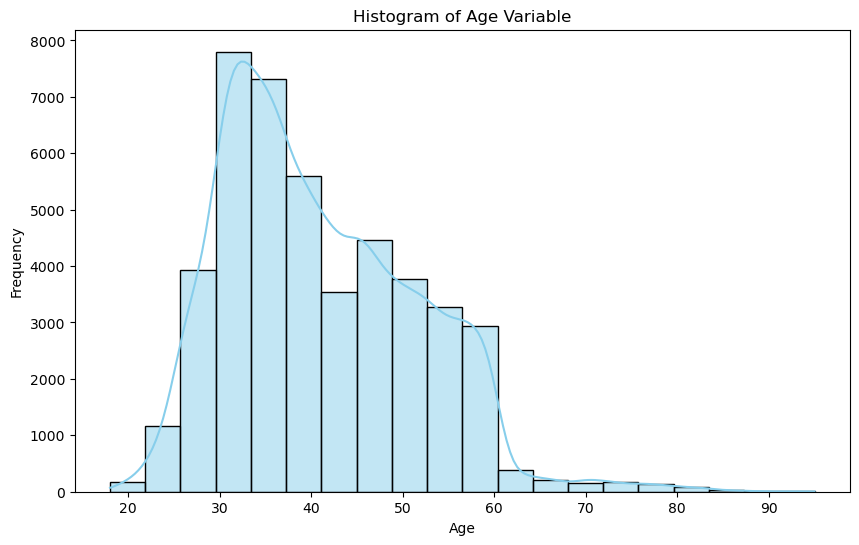

In [72]:
# Plot the histogram of the 'age' variable
plt.figure(figsize=(10, 6))
sns.histplot(inp1['age'], bins=20, kde=True, color='skyblue')
plt.title('Histogram of Age Variable')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

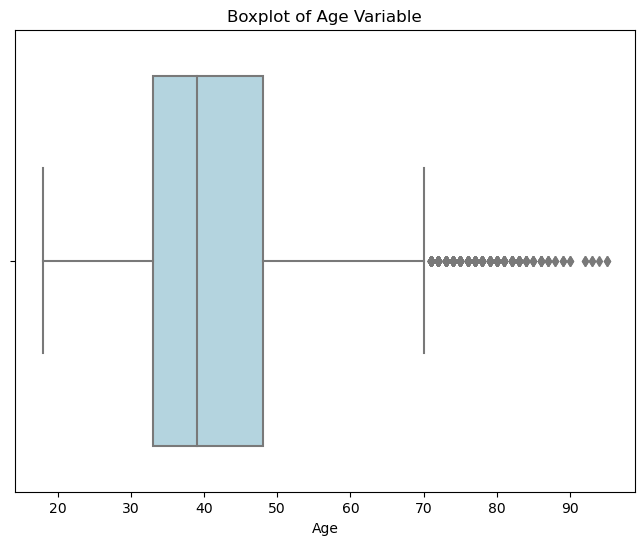

In [73]:
# Plot the boxplot of the 'age' variable
plt.figure(figsize=(8, 6))
sns.boxplot(x=inp1['age'], color='lightblue')
plt.title('Boxplot of Age Variable')
plt.xlabel('Age')
plt.show()


Number of outliers in the 'age' variable: 487


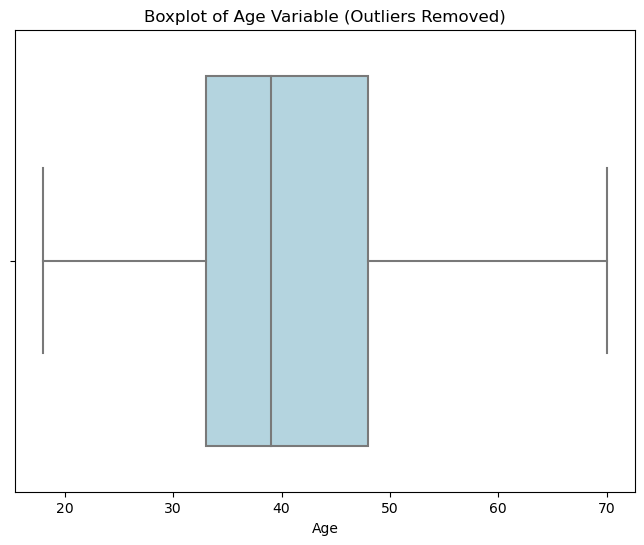

In [74]:
# Identify outliers in the 'age' variable
Q1 = inp1['age'].quantile(0.25)
Q3 = inp1['age'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
outliers_age = inp1[(inp1['age'] < lower_bound) | (inp1['age'] > upper_bound)]

# Print the number of outliers
print("Number of outliers in the 'age' variable:", len(outliers_age))

# Remove outliers from inp1
inp1 = inp1[(inp1['age'] >= lower_bound) & (inp1['age'] <= upper_bound)]

# Plot the boxplot of the 'age' variable after removing outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=inp1['age'], color='lightblue')
plt.title('Boxplot of Age Variable (Outliers Removed)')
plt.xlabel('Age')
plt.show()


#### Salary variable 

In [75]:
# Describe the 'salary' variable in inp1
salary_description = inp1['salary'].describe()
print("Description of the 'salary' variable in inp1:\n", salary_description)

Description of the 'salary' variable in inp1:
 count     44674.000000
mean      57034.964409
std       32231.672962
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64


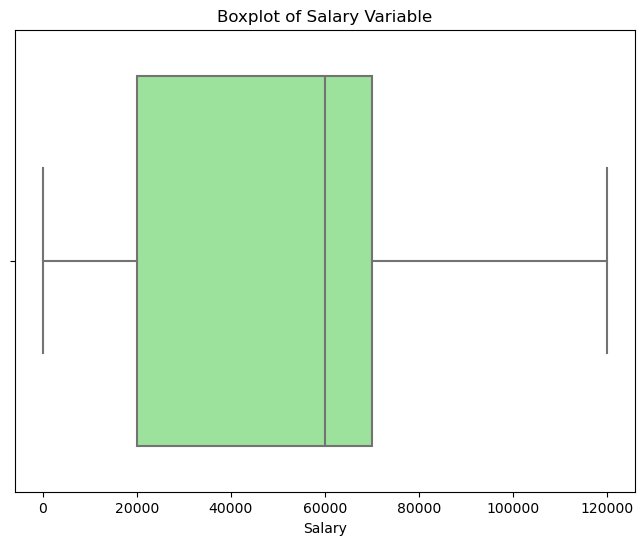

In [76]:
# Plot the boxplot of the 'salary' variable
plt.figure(figsize=(8, 6))
sns.boxplot(x=inp1['salary'], color='lightgreen')
plt.title('Boxplot of Salary Variable')
plt.xlabel('Salary')
plt.show()

#### Balance variable 

In [77]:
# Describe the 'balance' variable in inp1
balance_description = inp1['balance'].describe()
print("Description of the 'balance' variable in inp1:\n", balance_description)

Description of the 'balance' variable in inp1:
 count     44674.000000
mean       1345.910485
std        2984.363809
min       -8019.000000
25%          71.000000
50%         442.000000
75%        1408.000000
max      102127.000000
Name: balance, dtype: float64


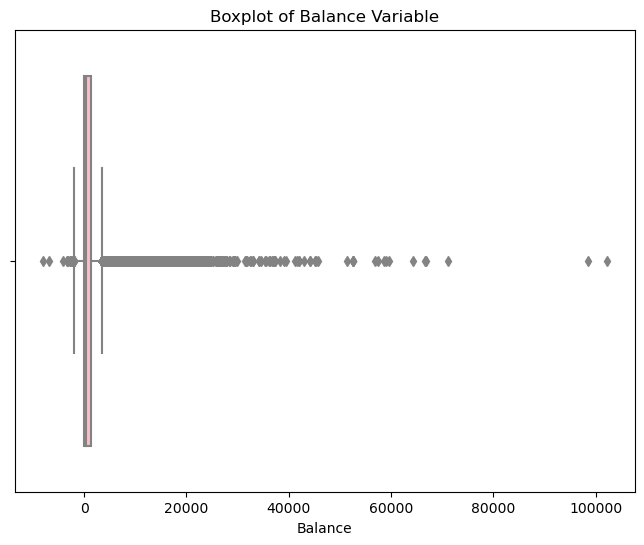

In [78]:
# Plot the boxplot of the 'balance' variable
plt.figure(figsize=(8, 6))
sns.boxplot(x=inp1['balance'], color='lightpink')
plt.title('Boxplot of Balance Variable')
plt.xlabel('Balance')
plt.show()

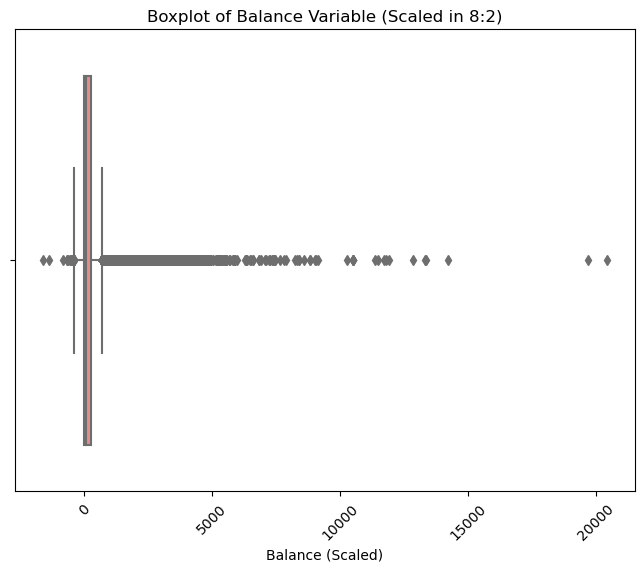

In [79]:
# Plot the boxplot of the 'balance' variable after scaling in 8:2
plt.figure(figsize=(8, 6))
sns.boxplot(x=inp1['balance'] * 0.2, color='lightcoral')
plt.title('Boxplot of Balance Variable (Scaled in 8:2)')
plt.xlabel('Balance (Scaled)')
plt.xticks(rotation=45)
plt.show()


In [80]:
# Print the quantiles (0.5, 0.7, 0.9, 0.95, and 0.99) of the 'balance' variable
quantiles_balance = inp1['balance'].quantile([0.5, 0.7, 0.9, 0.95, 0.99])
print("Quantiles of the 'balance' variable:")
print(quantiles_balance)

Quantiles of the 'balance' variable:
0.50      442.0
0.70     1109.1
0.90     3539.4
0.95     5733.0
0.99    13109.7
Name: balance, dtype: float64


### Standardising Values

Checklist for data standardization exercises:

1. **Standardise units:** Ensure all observations under one variable are expressed in a common and consistent unit. For example, convert lbs to kg, miles/hr to km/hr, etc.

2. **Scale values if required:** Ensure all observations under one variable have a common scale.

3. **Standardise precision:** Adjust the precision of numerical values for better presentation of data. For instance, change 4.5312341 kg to 4.53 kg.

4. **Remove extra characters:** Eliminate irrelevant characters such as common prefixes/suffixes, leading/trailing/multiple spaces, etc.

5. **Standardise case:** Ensure consistency in the casing styles of string variables. For example, convert strings to UPPERCASE, lowercase, Title Case, or Sentence case as necessary.

6. **Standardise format:** Standardize the format of other elements such as dates, names, etc. For instance, change date formats from 23/10/16 to 2016/10/23 and format names like "Modi, Narendra" to "Narendra Modi".

By following these steps, you can standardize the values in your dataset for better analysis and presentation.


#### Duration variable

In [81]:
# Describe the 'duration' variable in inp1
duration_description = inp1['duration'].describe()
print("Description of the 'duration' variable in inp1:\n", duration_description)

Description of the 'duration' variable in inp1:
 count       44674
unique       2640
top       1.5 min
freq          135
Name: duration, dtype: object


In [82]:
# Convert the 'duration' variable into single unit (minutes) and remove the sec or min prefix
inp1['duration'] = inp1['duration'].str.replace('sec', '').str.replace('min', '').astype(float) / 60


# Describe the 'duration' variable in inp1
duration_description = inp1['duration'].describe()
print("Description of the 'duration' variable in inp1:\n", duration_description)

Description of the 'duration' variable in inp1:
 count    44674.000000
mean         1.402112
std          3.091796
min          0.000000
25%          0.036944
50%          0.083611
75%          1.550000
max         64.683333
Name: duration, dtype: float64


### Univariate Analysis

#### Categorical Unordered Univariate Analysis

Unordered data do not have the notion of high-low, more-less, etc. Examples include:

- Type of loan taken by a person (e.g., home, personal, auto, etc.)
- Organization of a person (e.g., Sales, marketing, HR, etc.)
- Job category of a person
- Marital status of any one


#### Marital status 

Percentage of each marital status category:
marital
married     60.03
single      28.58
divorced    11.39
Name: proportion, dtype: float64

###############################################



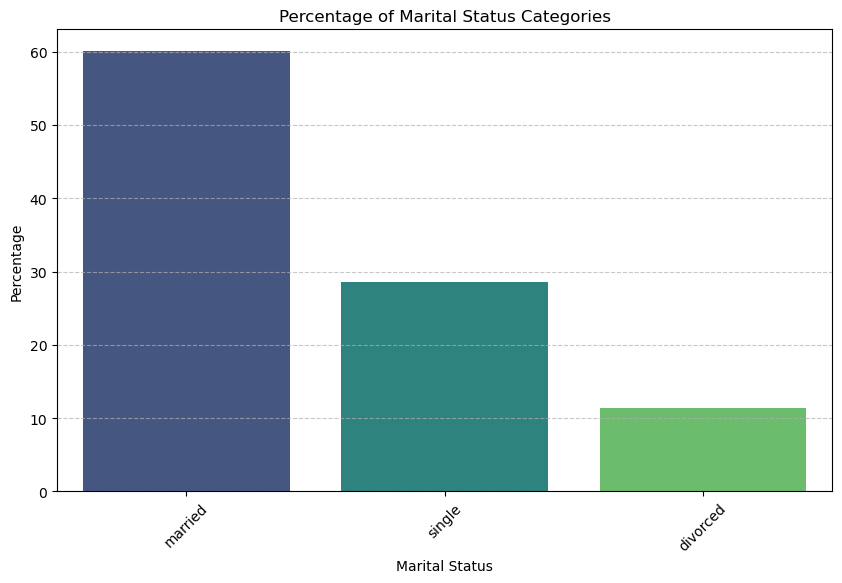

In [85]:
# Calculate the percentage of each marital status category
marital_status_percentage = (inp1['marital'].value_counts(normalize=True) * 100).round(2)

print("Percentage of each marital status category:")
print(marital_status_percentage)

# Add a separator
print("\n###############################################\n")

# Plot the bar graph of percentage marital status categories
plt.figure(figsize=(10, 6))
sns.barplot(x=marital_status_percentage.index, y=marital_status_percentage.values, palette='viridis')
plt.title('Percentage of Marital Status Categories')
plt.xlabel('Marital Status')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### Job  

Percentage of each job status category:
job
blue-collar      21.76
management       21.13
technician       16.98
admin.           11.55
services          9.29
retired           4.09
self-employed     3.51
entrepreneur      3.32
unemployed        2.91
housemaid         2.74
student           2.10
unknown           0.63
Name: proportion, dtype: float64

###############################################



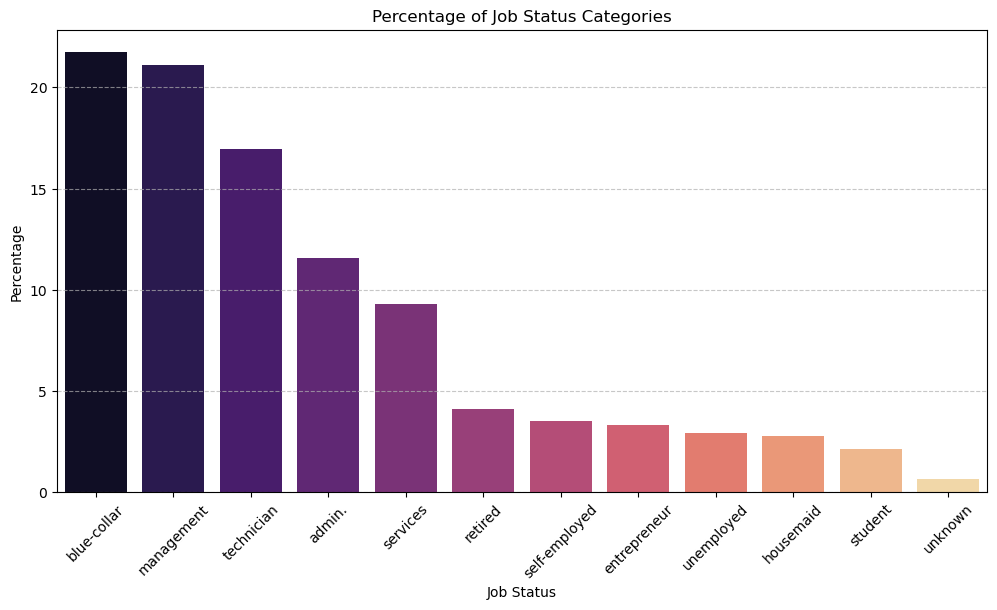

In [86]:
# Calculate the percentage of each job status category
job_status_percentage = (inp1['job'].value_counts(normalize=True) * 100).round(2)

print("Percentage of each job status category:")
print(job_status_percentage)

# Add a separator
print("\n###############################################\n")

# Plot the bar graph of percentage job categories
plt.figure(figsize=(12, 6))
sns.barplot(x=job_status_percentage.index, y=job_status_percentage.values, palette='magma')
plt.title('Percentage of Job Status Categories')
plt.xlabel('Job Status')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Categorical ordered univariate analysis 

Ordered variables have a predefined order or ranking associated with them. In the bank marketing dataset, examples of ordered variables include:

- Age group: Categories like "<30", "30-40", "40-50", and so on.
- Month: Months ordered as "Jan", "Feb", "Mar", and so on.
- Education: Categories such as "primary", "secondary", and so forth.


#### Education

Percentage of each education category:
education
secondary    51.59
tertiary     29.55
primary      14.82
unknown       4.04
Name: proportion, dtype: float64

###############################################



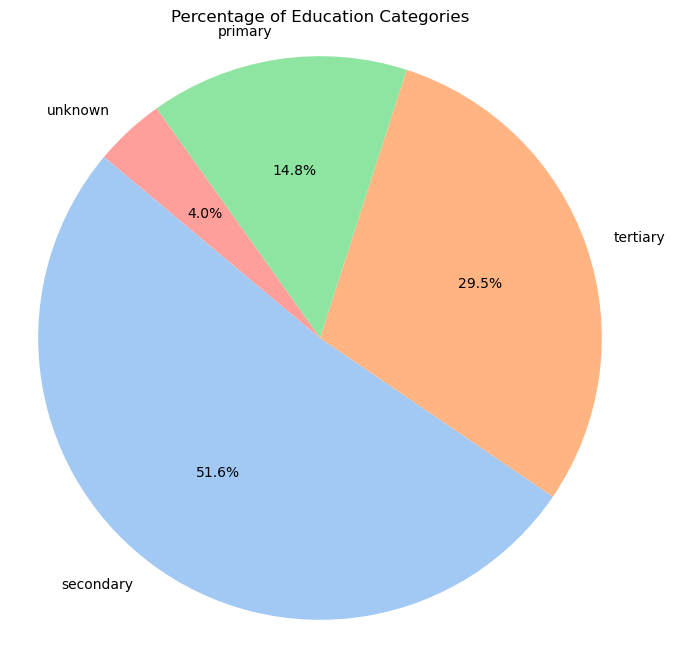

In [87]:
# Calculate the percentage of each education category
education_percentage = (inp1['education'].value_counts(normalize=True) * 100).round(2)

print("Percentage of each education category:")
print(education_percentage)

# Add a separator
print("\n###############################################\n")

# Plot the pie chart of education categories
plt.figure(figsize=(8, 8))
plt.pie(education_percentage, labels=education_percentage.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)
plt.title('Percentage of Education Categories')
plt.axis('equal')
plt.show()

#### poutcome 

In [88]:
# Calculate the percentage of each poutcome category
poutcome_percentage = (inp1['poutcome'].value_counts(normalize=True) * 100).round(2)

print("Percentage of each poutcome category:")
print(poutcome_percentage)


Percentage of each poutcome category:
poutcome
unknown    81.96
failure    10.81
other       4.04
success     3.19
Name: proportion, dtype: float64


#### Response the target variable 

Percentage of each response category:
response
no     88.66
yes    11.34
Name: proportion, dtype: float64

###############################################



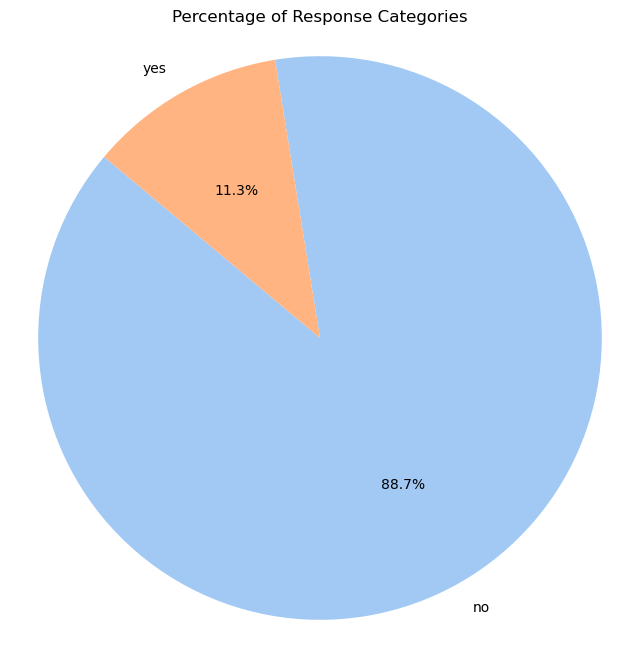

In [89]:
# Calculate the percentage of each response category
response_percentage = (inp1['response'].value_counts(normalize=True) * 100).round(2)

print("Percentage of each response category:")
print(response_percentage)

# Add a separator
print("\n###############################################\n")

# Plot the pie chart of response categories
plt.figure(figsize=(8, 8))
plt.pie(response_percentage, labels=response_percentage.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)
plt.title('Percentage of Response Categories')
plt.axis('equal')
plt.show()


### Bivariate and Multivariate Analysis

#### Numeric-Numeric Analysis
When analyzing numeric-numeric data types simultaneously, there are three common methods:

1. Scatter Plot: Describes the pattern of how one variable varies with another variable.
2. Correlation Matrix: Describes the degree of linear relationship between two numeric variables.
3. Pair Plot: Group of scatter plots depicting relationships among all numeric variables in the dataset.


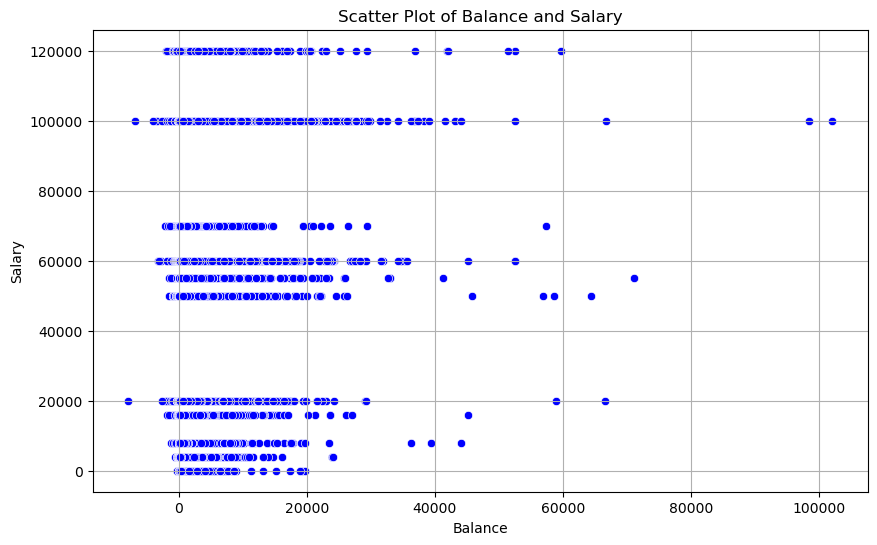


###############################################



In [91]:
# Plot the scatter plot of balance and salary variable in inp1
plt.figure(figsize=(10, 6))
sns.scatterplot(data=inp1, x='balance', y='salary', color='blue')
plt.title('Scatter Plot of Balance and Salary')
plt.xlabel('Balance')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

# Add a separator
print("\n###############################################\n")


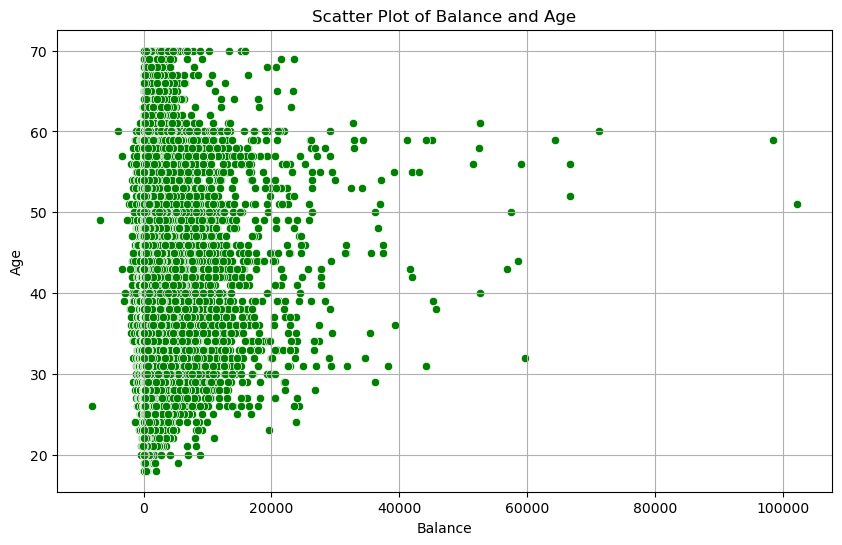

In [92]:
# Plot the scatter plot of balance and age variable in inp1
plt.figure(figsize=(10, 6))
sns.scatterplot(data=inp1, x='balance', y='age', color='green')
plt.title('Scatter Plot of Balance and Age')
plt.xlabel('Balance')
plt.ylabel('Age')
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

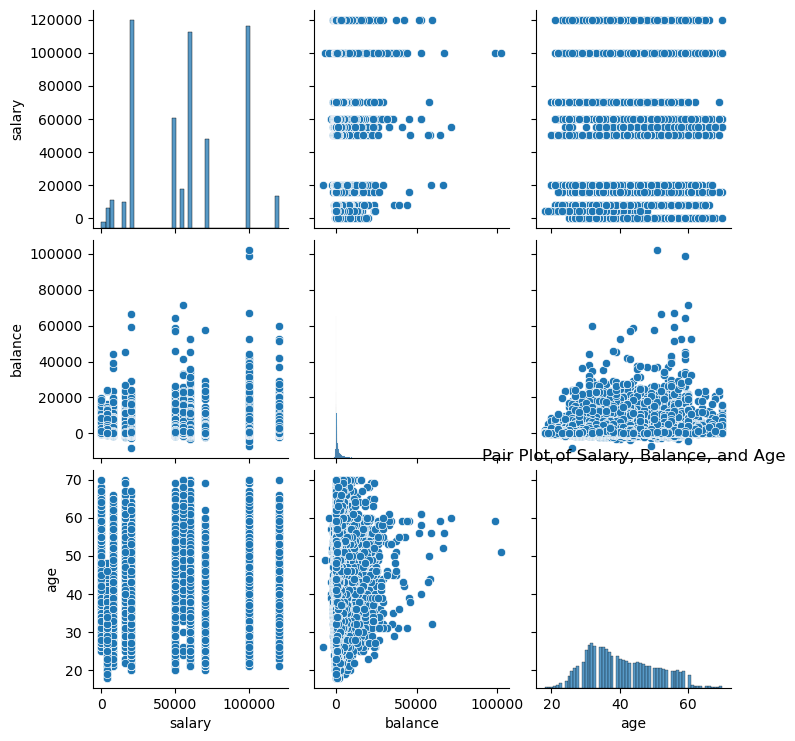

In [93]:
# Plot the pair plot of salary, balance and age in inp1 dataframe
plt.figure(figsize=(10, 6))
sns.pairplot(inp1[['salary', 'balance', 'age']])
plt.title('Pair Plot of Salary, Balance, and Age')
plt.show()

#### Correlation heat map 

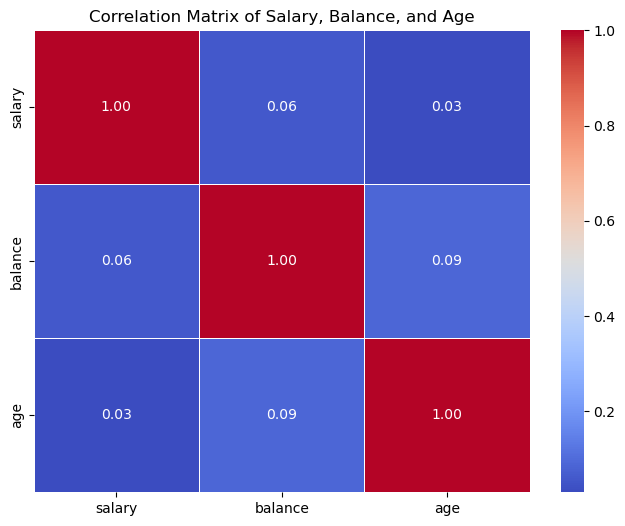

In [94]:
# Plot the correlation matrix of salary, balance, and age in inp1 dataframe
plt.figure(figsize=(8, 6))
sns.heatmap(inp1[['salary', 'balance', 'age']].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Salary, Balance, and Age')
plt.show()


### Numerical categorical variable

#### Salary vs response 

In [95]:
# Group by the 'response' column to find the mean of the salary with response 'no' and 'yes' separately
mean_salary_response = inp1.groupby('response')['salary'].mean()
print("Mean salary with response 'no' and 'yes' separately:")
print(mean_salary_response)

# Add a separator
print("\n###############################################\n")

# Group by the 'response' column to find the median of the salary with response 'no' and 'yes' separately
median_salary_response = inp1.groupby('response')['salary'].median()
print("Median salary with response 'no' and 'yes' separately:")
print(median_salary_response)


Mean salary with response 'no' and 'yes' separately:
response
no     56791.097533
yes    58941.188080
Name: salary, dtype: float64

###############################################

Median salary with response 'no' and 'yes' separately:
response
no     60000.0
yes    60000.0
Name: salary, dtype: float64


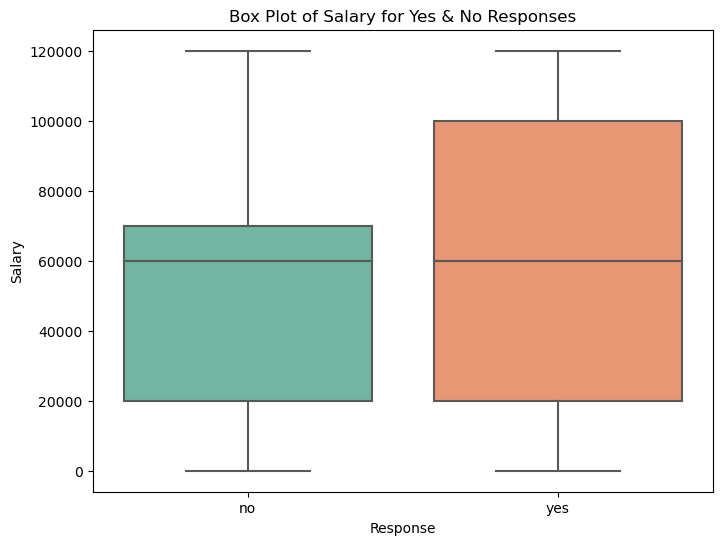

In [96]:
# Plot the box plot of salary for 'yes' and 'no' responses
plt.figure(figsize=(8, 6))
sns.boxplot(data=inp1, x='response', y='salary', palette='Set2')
plt.title('Box Plot of Salary for Yes & No Responses')
plt.xlabel('Response')
plt.ylabel('Salary')
plt.show()


#### Balance vs response 

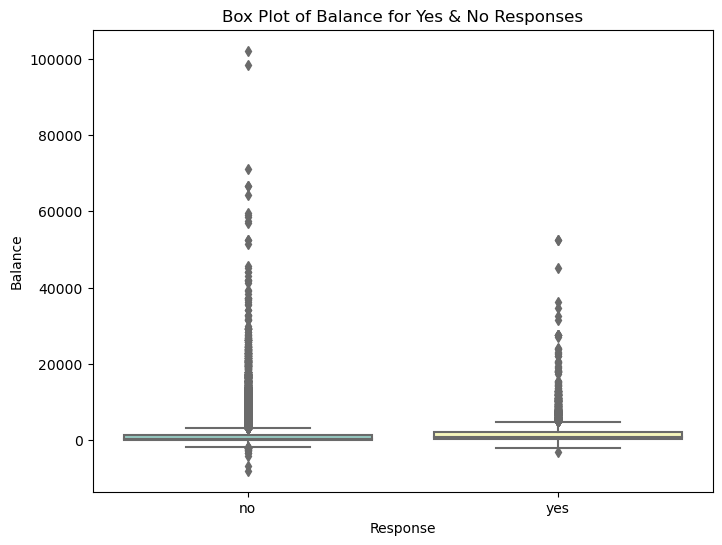

In [97]:
# Plot the box plot of balance for 'yes' and 'no' responses
plt.figure(figsize=(8, 6))
sns.boxplot(data=inp1, x='response', y='balance', palette='Set3')
plt.title('Box Plot of Balance for Yes & No Responses')
plt.xlabel('Response')
plt.ylabel('Balance')
plt.show()


In [98]:
# Group by the 'response' column to find the mean of the balance with response 'no' and 'yes' separately
mean_balance_response = inp1.groupby('response')['balance'].mean()
print("Mean balance with response 'no' and 'yes' separately:")
print(mean_balance_response)

# Add a separator
print("\n###############################################\n")

# Group by the 'response' column to find the median of the balance with response 'no' and 'yes' separately
median_balance_response = inp1.groupby('response')['balance'].median()
print("Median balance with response 'no' and 'yes' separately:")
print(median_balance_response)


Mean balance with response 'no' and 'yes' separately:
response
no     1295.844548
yes    1737.258733
Name: balance, dtype: float64

###############################################

Median balance with response 'no' and 'yes' separately:
response
no     415.0
yes    704.0
Name: balance, dtype: float64


##### 75th percentile 

Mean, Median, and 75th Percentile of Balance with Response:
                 mean  median     p75
response                             
no        1295.844548   415.0  1336.0
yes       1737.258733   704.0  2087.0


<Figure size 1000x600 with 0 Axes>

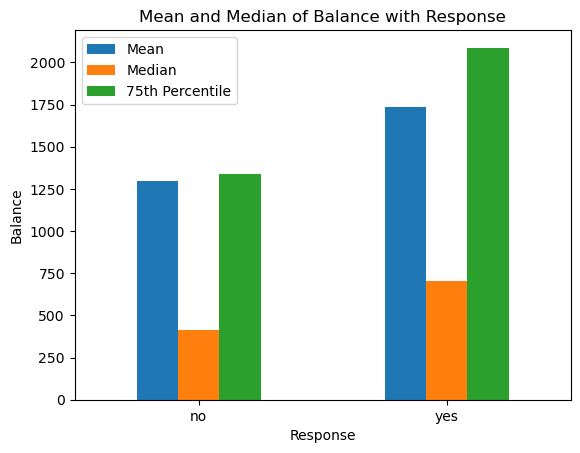

In [99]:
# Function to find the 75th percentile
def p75(x):
    return np.quantile(x, 0.75)

# Calculate the mean, median, and 75th percentile of balance with response
balance_stats = inp1.groupby('response')['balance'].agg(['mean', 'median', p75])
print("Mean, Median, and 75th Percentile of Balance with Response:")
print(balance_stats)

# Plot the bar graph of balance's mean and median with response
plt.figure(figsize=(10, 6))
balance_stats.plot(kind='bar')
plt.title("Mean and Median of Balance with Response")
plt.xlabel("Response")
plt.ylabel("Balance")
plt.xticks(rotation=0)
plt.legend(["Mean", "Median", "75th Percentile"])
plt.show()


#### Education vs salary 

In [100]:
# Group by the 'education' column to find the mean of the salary for each education category
mean_salary_education = inp1.groupby('education')['salary'].mean()
print("Mean salary for each education category:")
print(mean_salary_education)

# Add a separator
print("\n###############################################\n")

# Group by the 'education' column to find the median of the salary for each education category
median_salary_education = inp1.groupby('education')['salary'].median()
print("Median salary for each education category:")
print(median_salary_education)


Mean salary for each education category:
education
primary      33628.360012
secondary    49700.538008
tertiary     83045.457989
unknown      46359.002770
Name: salary, dtype: float64

###############################################

Median salary for each education category:
education
primary       20000.0
secondary     55000.0
tertiary     100000.0
unknown       50000.0
Name: salary, dtype: float64


#### Job vs salary

In [101]:
# Group by the 'job' column to find the mean of the salary for each job category
mean_salary_job = inp1.groupby('job')['salary'].mean()
print("Mean salary for each job category:")
print(mean_salary_job)


Mean salary for each job category:
job
admin.            50000.0
blue-collar       20000.0
entrepreneur     120000.0
housemaid         16000.0
management       100000.0
retired           55000.0
self-employed     60000.0
services          70000.0
student            4000.0
technician        60000.0
unemployed         8000.0
unknown               0.0
Name: salary, dtype: float64


### Segment- 5, Categorical categorical variable 

In [102]:
# Create a response_flag column where 'yes' responses are assigned 1 and 'no' responses are assigned 0
inp1['response_flag'] = inp1['response'].map({'yes': 1, 'no': 0})

# Display the first few rows of the dataframe to verify the changes
print(inp1.head())


    age  salary  balance  marital targeted default housing loan  contact  day  \
0  58.0  100000     2143  married      yes      no     yes   no  unknown    5   
1  44.0   60000       29   single      yes      no     yes   no  unknown    5   
2  33.0  120000        2  married      yes      no     yes  yes  unknown    5   
3  47.0   20000     1506  married       no      no     yes   no  unknown    5   
4  33.0       0        1   single       no      no      no   no  unknown    5   

       month  duration  campaign  pdays  previous poutcome response  \
0  may, 2017  4.350000         1    NaN         0  unknown       no   
1  may, 2017  2.516667         1    NaN         0  unknown       no   
2  may, 2017  1.266667         1    NaN         0  unknown       no   
3  may, 2017  1.533333         1    NaN         0  unknown       no   
4  may, 2017  3.300000         1    NaN         0  unknown       no   

            job  education  response_flag  
0    management   tertiary              0 

#### Education vs response rate

In [103]:
# Calculate the mean of response_flag with different education categories
mean_response_flag_education = inp1.groupby('education')['response_flag'].mean()
print("Mean of response_flag with different education categories:")
print(mean_response_flag_education)


Mean of response_flag with different education categories:
education
primary      0.074147
secondary    0.103653
tertiary     0.148269
unknown      0.127424
Name: response_flag, dtype: float64


#### Marital vs response rate 

Mean of response_flag with different marital status categories:
marital
divorced    0.112203
married     0.096499
single      0.149460
Name: response_flag, dtype: float64


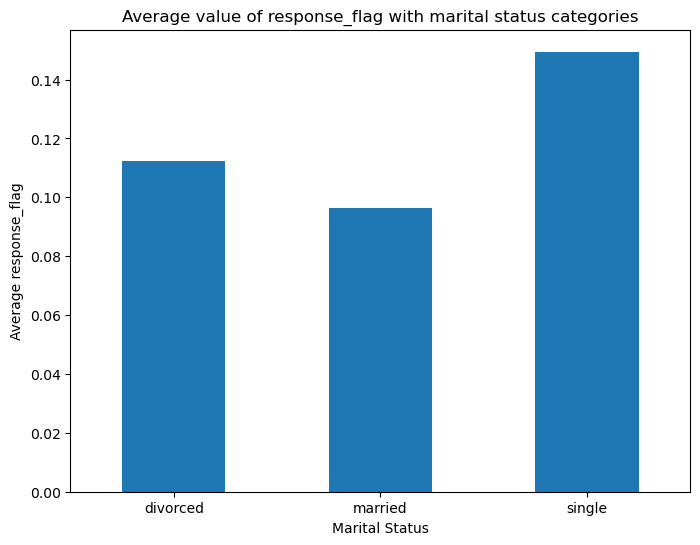

In [104]:
# Calculate the mean of response_flag with different marital status categories
mean_response_flag_marital = inp1.groupby('marital')['response_flag'].mean()
print("Mean of response_flag with different marital status categories:")
print(mean_response_flag_marital)

# Plot the bar graph of marital status with average value of response_flag
plt.figure(figsize=(8, 6))
mean_response_flag_marital.plot(kind='bar')
plt.title("Average value of response_flag with marital status categories")
plt.xlabel("Marital Status")
plt.ylabel("Average response_flag")
plt.xticks(rotation=0)
plt.show()


#### Loans vs response rate 

Mean of response_flag with different personal loan status categories:
loan
no     0.122410
yes    0.066842
Name: response_flag, dtype: float64


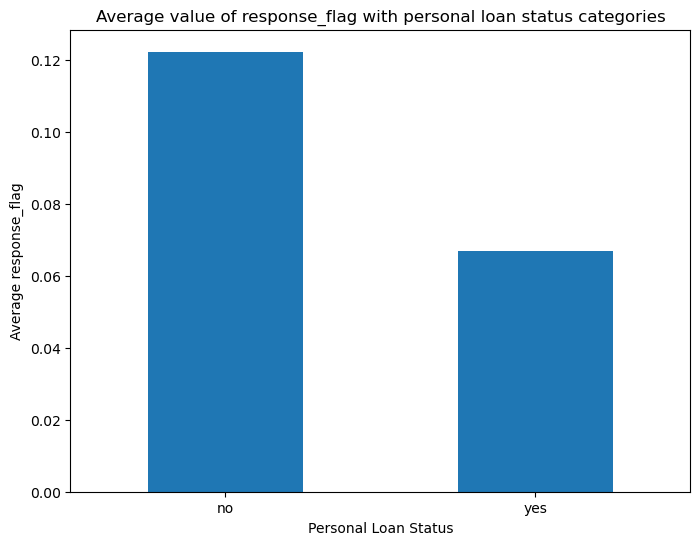

In [105]:
# Calculate the mean of response_flag with different personal loan status categories
mean_response_flag_loan = inp1.groupby('loan')['response_flag'].mean()
print("Mean of response_flag with different personal loan status categories:")
print(mean_response_flag_loan)

# Plot the bar graph of personal loan status with average value of response_flag
plt.figure(figsize=(8, 6))
mean_response_flag_loan.plot(kind='bar')
plt.title("Average value of response_flag with personal loan status categories")
plt.xlabel("Personal Loan Status")
plt.ylabel("Average response_flag")
plt.xticks(rotation=0)
plt.show()


#### Housing loans vs response rate 

Mean of response_flag with different housing loan status categories:
housing
no     0.160515
yes    0.076653
Name: response_flag, dtype: float64


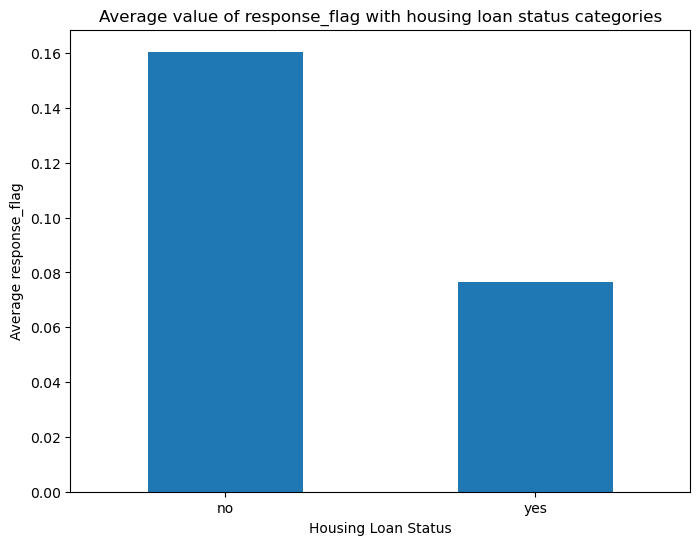

In [106]:
# Calculate the mean of response_flag with different housing loan status categories
mean_response_flag_housing = inp1.groupby('housing')['response_flag'].mean()
print("Mean of response_flag with different housing loan status categories:")
print(mean_response_flag_housing)

# Plot the bar graph of housing loan status with average value of response_flag
plt.figure(figsize=(8, 6))
mean_response_flag_housing.plot(kind='bar')
plt.title("Average value of response_flag with housing loan status categories")
plt.xlabel("Housing Loan Status")
plt.ylabel("Average response_flag")
plt.xticks(rotation=0)
plt.show()


#### Age vs response 

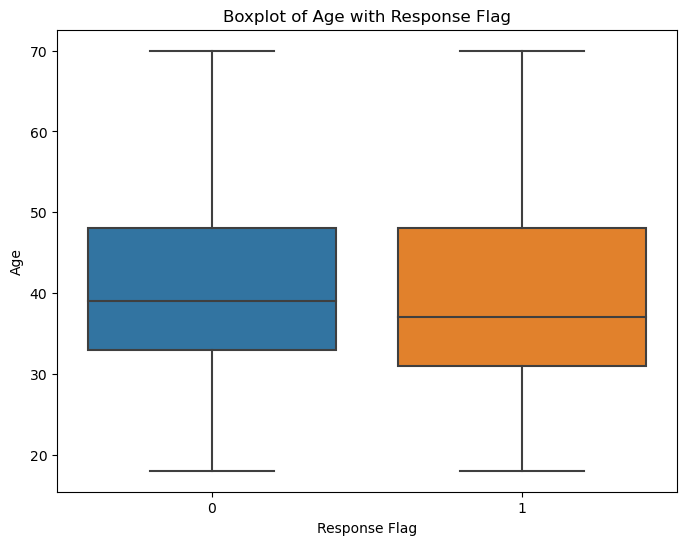

In [107]:
# Plot the boxplot of age with response_flag
plt.figure(figsize=(8, 6))
sns.boxplot(x='response_flag', y='age', data=inp1)
plt.title("Boxplot of Age with Response Flag")
plt.xlabel("Response Flag")
plt.ylabel("Age")
plt.show()


##### making buckets from age columns 

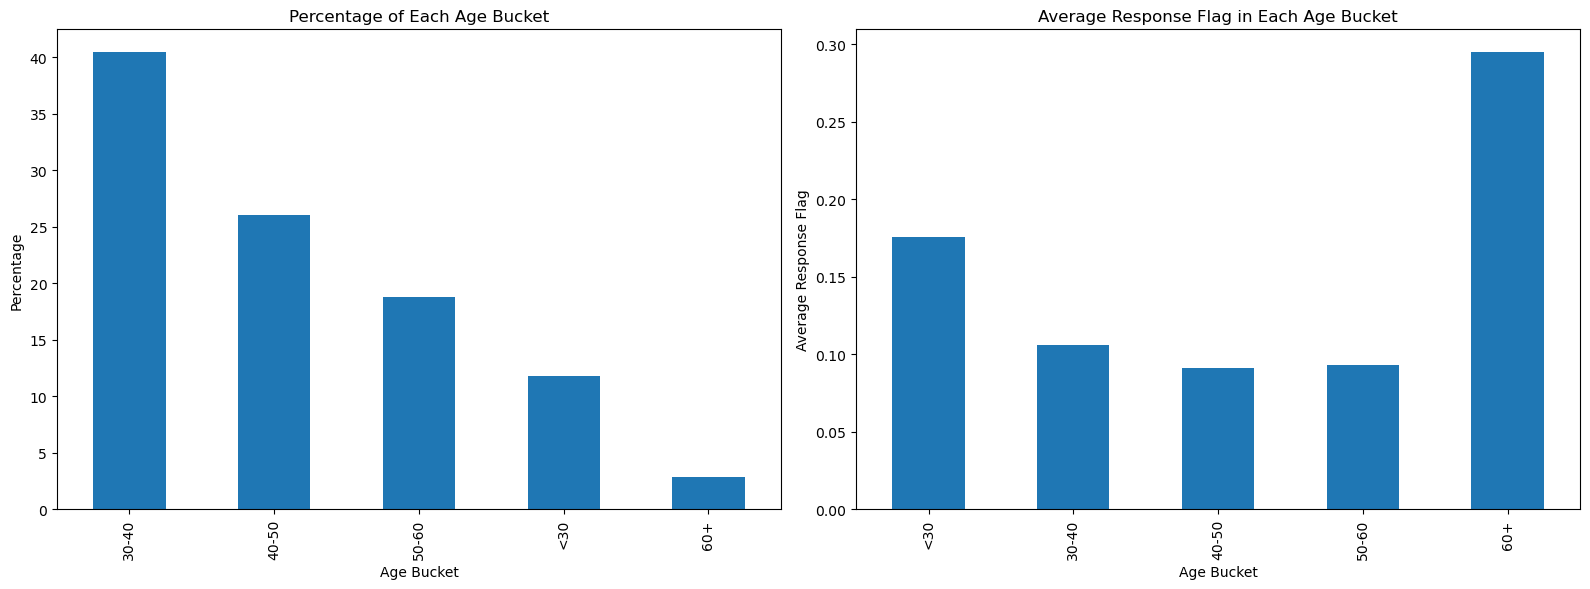

In [108]:
# Create buckets for age column
bins = [0, 30, 40, 50, 60, np.inf]
labels = ['<30', '30-40', '40-50', '50-60', '60+']
inp1['age_bucket'] = pd.cut(inp1['age'], bins=bins, labels=labels, right=False)

# Calculate percentage of each age bucket
age_bucket_percentage = inp1['age_bucket'].value_counts(normalize=True) * 100

# Calculate average values of response_flag in each age bucket
avg_response_flag_age_bucket = inp1.groupby('age_bucket')['response_flag'].mean()

# Plot in subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot percentage of each age bucket
age_bucket_percentage.plot(kind='bar', ax=axes[0])
axes[0].set_title("Percentage of Each Age Bucket")
axes[0].set_xlabel("Age Bucket")
axes[0].set_ylabel("Percentage")

# Plot average values of response_flag in each age bucket
avg_response_flag_age_bucket.plot(kind='bar', ax=axes[1])
axes[1].set_title("Average Response Flag in Each Age Bucket")
axes[1].set_xlabel("Age Bucket")
axes[1].set_ylabel("Average Response Flag")

plt.tight_layout()
plt.show()


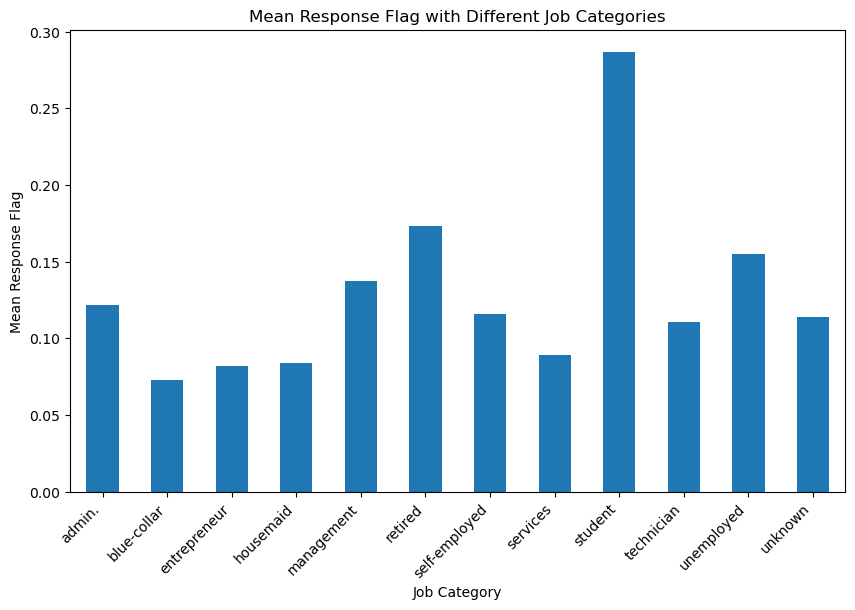

In [109]:
# Calculate the mean of response_flag with different job categories
mean_response_flag_job = inp1.groupby('job')['response_flag'].mean()

# Plot the bar graph of job categories with response_flag mean value
plt.figure(figsize=(10, 6))
mean_response_flag_job.plot(kind='bar')
plt.title("Mean Response Flag with Different Job Categories")
plt.xlabel("Job Category")
plt.ylabel("Mean Response Flag")
plt.xticks(rotation=45, ha='right')
plt.show()


### Segment-6, Multivariate analysis 

#### Education vs marital vs response 

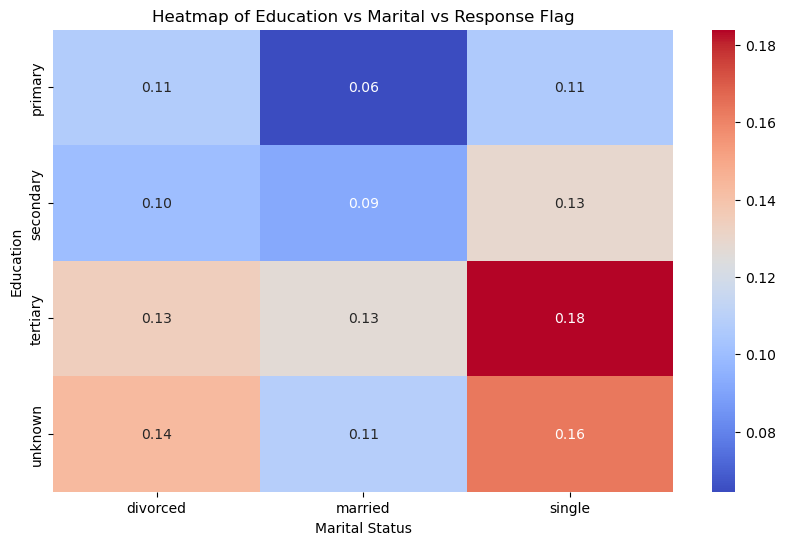

In [110]:
# Create a pivot table with education, marital, and response_flag
pivot_table = pd.pivot_table(inp1, values='response_flag', index='education', columns='marital', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Education vs Marital vs Response Flag')
plt.xlabel('Marital Status')
plt.ylabel('Education')
plt.show()


#### Job vs marital vs response 

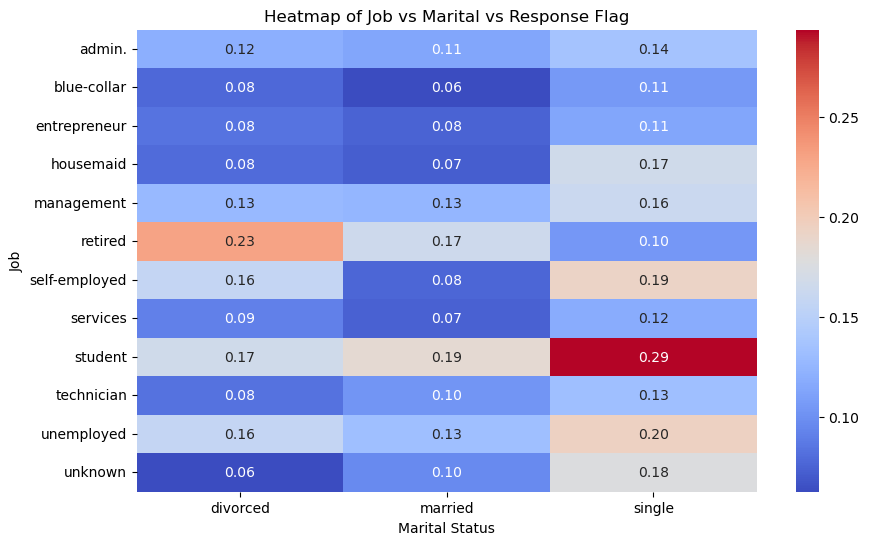

In [111]:
# Create a pivot table with job, marital, and response_flag
pivot_table = pd.pivot_table(inp1, values='response_flag', index='job', columns='marital', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Job vs Marital vs Response Flag')
plt.xlabel('Marital Status')
plt.ylabel('Job')
plt.show()


#### Education vs poutcome vs response

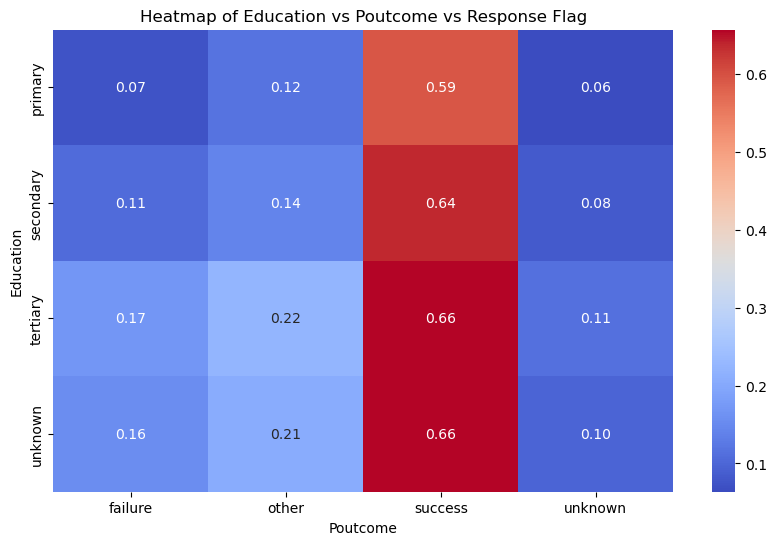

In [112]:
#create the heat map of education vs poutcome vs response_flag.
# Create a pivot table with education, poutcome, and response_flag
pivot_table = pd.pivot_table(inp1, values='response_flag', index='education', columns='poutcome', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Education vs Poutcome vs Response Flag')
plt.xlabel('Poutcome')
plt.ylabel('Education')
plt.show()


## Conclusion

In this analysis of the bank marketing dataset, we performed a comprehensive exploration of the data through various stages:

1. **Data Cleaning and Preparation**: We identified missing values, corrected data types, and handled outliers appropriately.

2. **Exploratory Data Analysis (EDA)**: Through univariate analysis, we gained insights into individual variables, including their distributions and relationships. We analyzed categorical variables like job, education, and marital status, as well as numerical variables like age, salary, and balance. Additionally, we conducted bivariate and multivariate analyses to understand the relationships between variables, using techniques such as scatter plots, correlation matrices, and pair plots.

3. **Key Findings**:
   - The majority of customers fall within the age range of 30 to 50 years old.
   - Most customers have secondary or tertiary education levels.
   - The dataset contains a mix of categorical and numerical variables, providing a rich source of information for analysis.
   - Response rates vary across different demographic and socioeconomic groups, suggesting potential targeting strategies for marketing campaigns.

4. **Recommendations**:
   - Focus marketing efforts on age groups with higher response rates, such as those under 30 or between 50 and 60 years old.
   - Tailor marketing messages based on customers' educational backgrounds to increase engagement.
   - Further investigate the correlation between variables like balance, salary, and response rate to identify potential predictors of campaign success.

Overall, this analysis lays the foundation for more targeted and effective marketing strategies aimed at maximizing response rates and optimizing campaign outcomes.
